In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats




In [3]:
#Checking the Dataset

# Loading the dataset 
df = pd.read_csv("/Users/bharatheeshls/Downloads/DATASET.csv")

# Displaying the first few rows
df.head()
# Getting dataset info (columns, data types, missing values)
df.info()
# Checking for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326921 entries, 0 to 326920
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   event_id            326921 non-null  int64  
 1   session_id          326921 non-null  int64  
 2   user_id             326921 non-null  int64  
 3   variation           326921 non-null  int64  
 4   platform            326921 non-null  object 
 5   datetime_event      326921 non-null  object 
 6   event_type          326921 non-null  object 
 7   final_order_status  170632 non-null  object 
 8   shop_id             315842 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 22.4+ MB


event_id                   0
session_id                 0
user_id                    0
variation                  0
platform                   0
datetime_event             0
event_type                 0
final_order_status    156289
shop_id                11079
dtype: int64

In [ ]:
#Data Cleaning & Preprocessing

df["datetime_event"] = pd.to_datetime(df["datetime_event"]) #Converting datetime_event to DateTime Format

df["variation_label"] = df["variation"].map({1: "Control", 2: "Test"}) #Createing a Readable Variation Label

df["event_type"].unique() #Ensureing Data Consistency

df_orders = df[df["event_type"] == "order_paid"]


In [12]:
#Computing Conversion Rates

# Counting total users per group
user_counts = df.groupby("variation_label")["user_id"].nunique()

# Counting users who completed an order
order_counts = df_orders.groupby("variation_label")["user_id"].nunique()

# Calculating conversion rates
conversion_rates = (order_counts / user_counts) * 100
print("Conversion Rates:\n", conversion_rates)


Conversion Rates:
 variation_label
Control    42.412308
Test       42.200000
Name: user_id, dtype: float64


/var/folders/gd/xc4sqkw17z9dzb81bfn98vwh0000gn/T/ipykernel_45916/3024943172.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette="viridis")


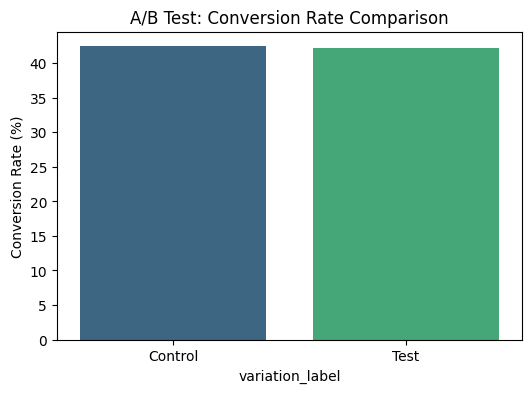

In [13]:
# Visualizing the Conversion Rates

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette="viridis")
plt.ylabel("Conversion Rate (%)")
plt.title("A/B Test: Conversion Rate Comparison")
plt.show()


In [15]:
#Performing Statistical Significance Test

from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.DataFrame({
    "Converted": order_counts,
    "Not Converted": user_counts - order_counts
})

# Performing Chi-Square Test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p_value:.4f}")

# Checking significance
if p_value < 0.05:
    print("Statistically significant difference! The test group performs differently.")
else:
    print("No statistically significant difference between control and test groups.")


Chi-Square Statistic: 0.4114
P-Value: 0.5213
No statistically significant difference between control and test groups.


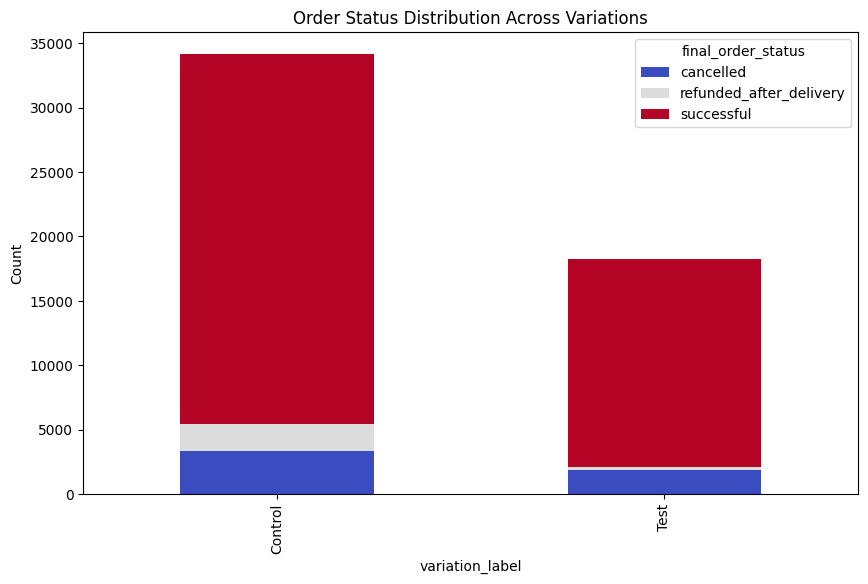

In [16]:
#Analyzing Order Status

# Grouping by variation and order status
order_status_counts = df[df["event_type"] == "order_finished"].groupby(["variation_label", "final_order_status"]).size().unstack()

# Ploting order status distribution
order_status_counts.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.title("Order Status Distribution Across Variations")
plt.ylabel("Count")
plt.show()


In [17]:
#Platform-Based Analysis

platform_conversion = df_orders.groupby(["variation_label", "platform"])["user_id"].nunique() / user_counts * 100
print("Platform-wise Conversion Rates:\n", platform_conversion)


Platform-wise Conversion Rates:
 variation_label  platform
Control          Android     28.895385
                 iOS         13.516923
Test             Android     28.665714
                 iOS         13.534286
Name: user_id, dtype: float64
